About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

About this file

Add Suggestion
Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.corr()["Outcome"].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

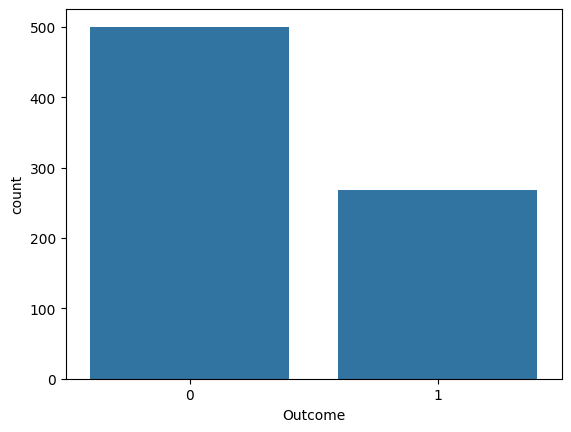

In [7]:
sns.countplot(data = df, x = "Outcome") 
# Outcome class is a little imbalanced 

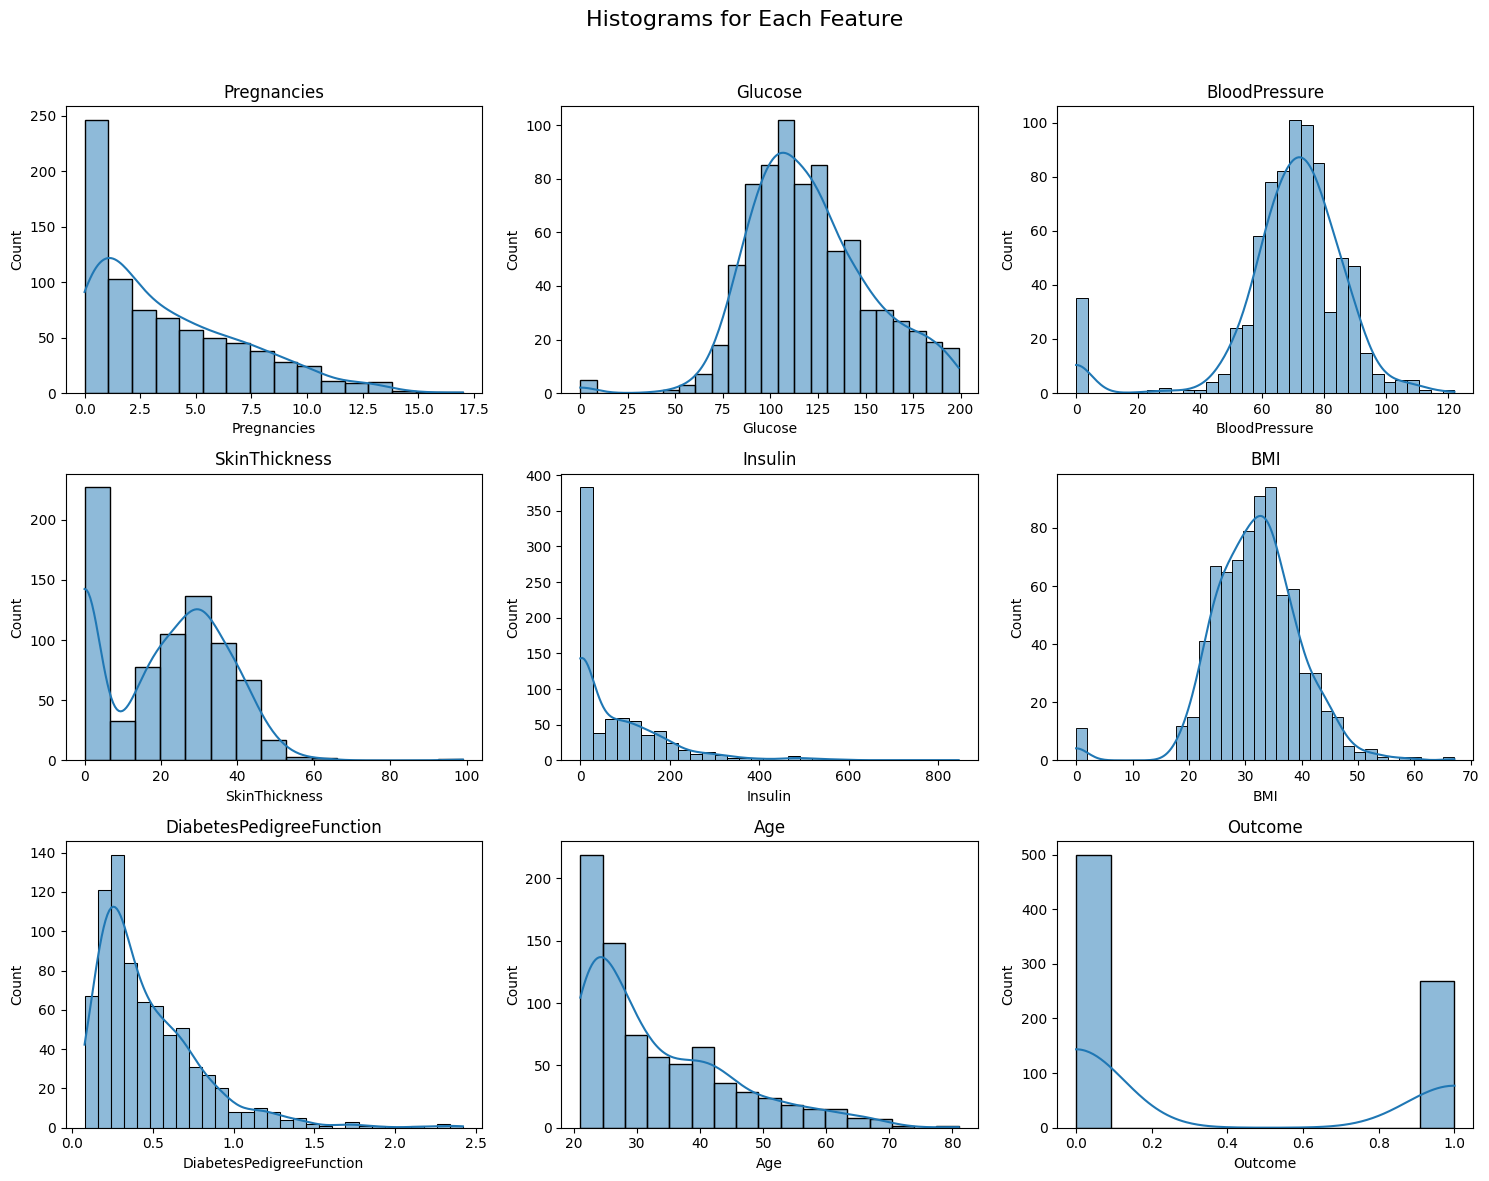

In [8]:
selected_features = df.columns[:9]  


fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid for 9 plots
fig.suptitle("Histograms for Each Feature", fontsize=16)

# Plot histograms for each feature
for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit title
plt.show()

from the above graph we can see that some data points have 0 value for BloodPressure , BMI and Glucose 

In [9]:
df[df["BloodPressure"] == 0 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [10]:
len(df[df["BloodPressure"] == 0 ])

35

In [11]:
len(df)

768

In [12]:
( 35 / 768 ) * 100 

4.557291666666666

around 4.5 percent of our data has missing values , let's drop it 

In [13]:
df = df[df["BloodPressure"] != 0]

Replotting the histogram to check for remaining missing values

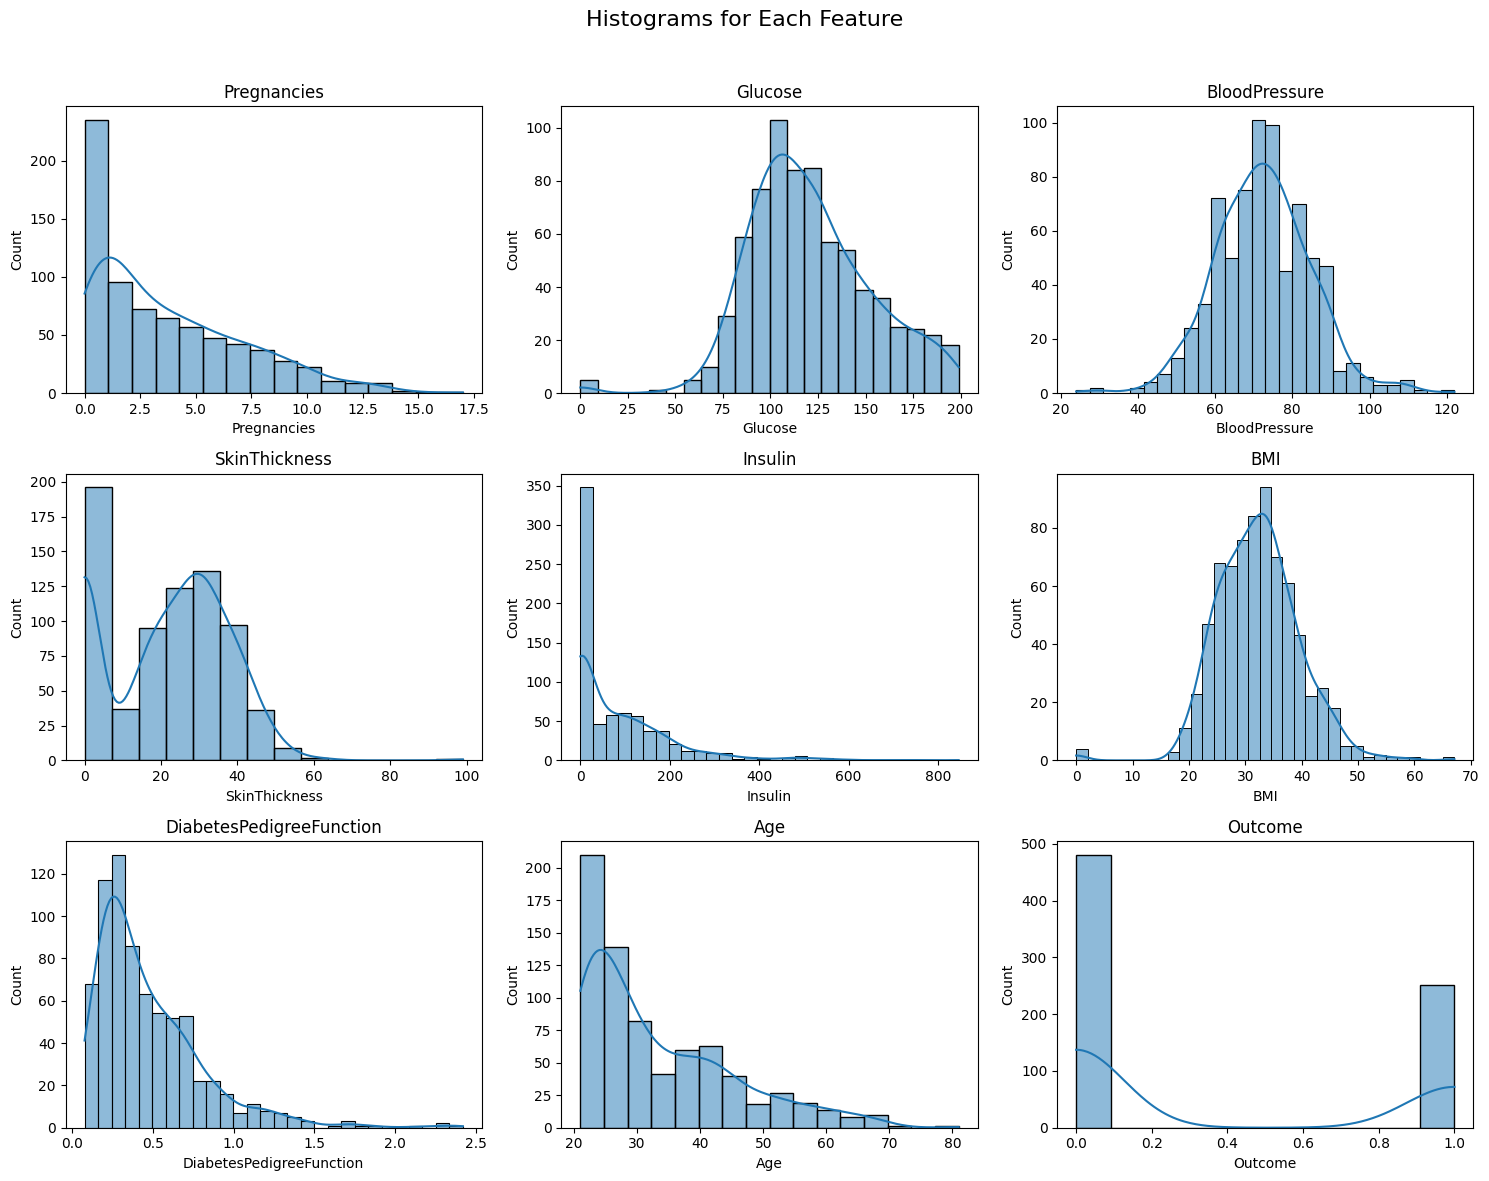

In [14]:
selected_features = df.columns[:9]  


fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid for 9 plots
fig.suptitle("Histograms for Each Feature", fontsize=16)

# Plot histograms for each feature
for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit title
plt.show()

some data points are still left with BMI = 0 and Glucose = 0 

In [15]:
df[df["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [16]:
df[df["BMI"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
684,5,136,82,0,0,0.0,0.640,69,0


In [17]:
df = df[df["Glucose"]!=0]

In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
df = df[df["BMI"] != 0]

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


replotting the histogram

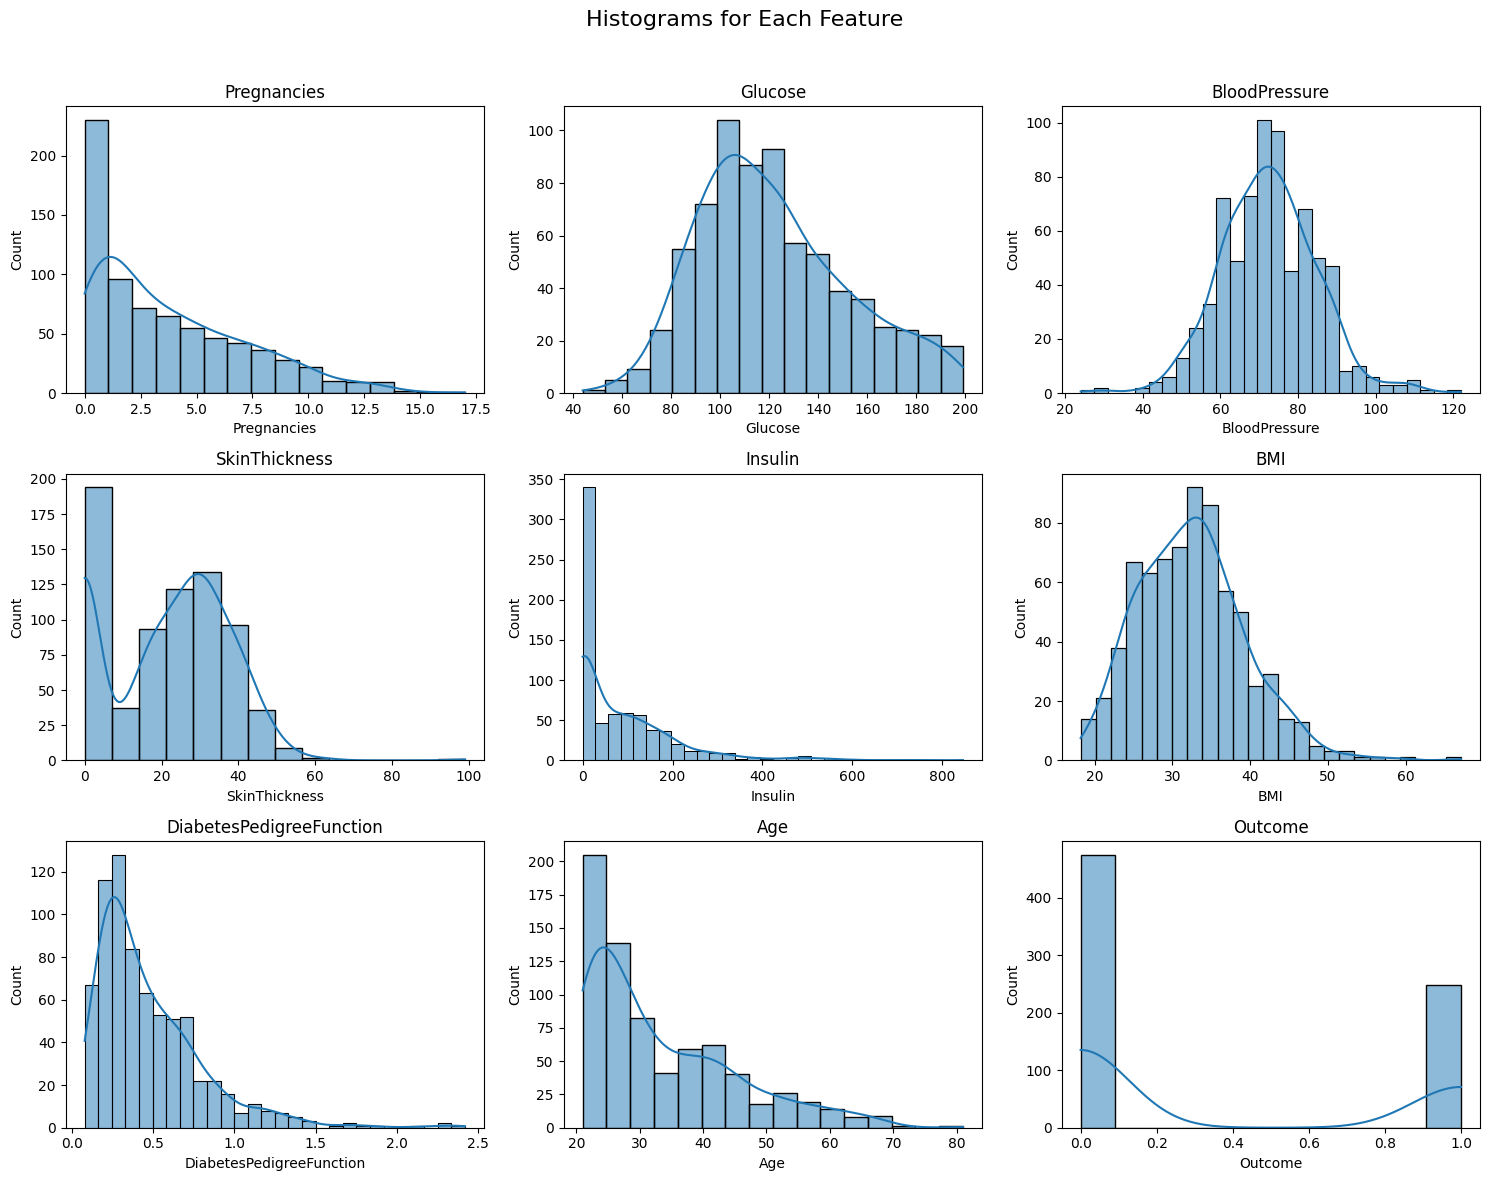

In [21]:
selected_features = df.columns[:9]  


fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid for 9 plots
fig.suptitle("Histograms for Each Feature", fontsize=16)

# Plot histograms for each feature
for i, feature in enumerate(selected_features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(feature)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit title
plt.show()

In [22]:
df[df["BloodPressure"] < 40].sort_values(by = "BloodPressure")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
597,1,89,24,19,25,27.8,0.559,21,0
18,1,103,30,38,83,43.3,0.183,33,0
125,1,88,30,42,99,55.0,0.496,26,1
599,1,109,38,18,120,23.1,0.407,26,0


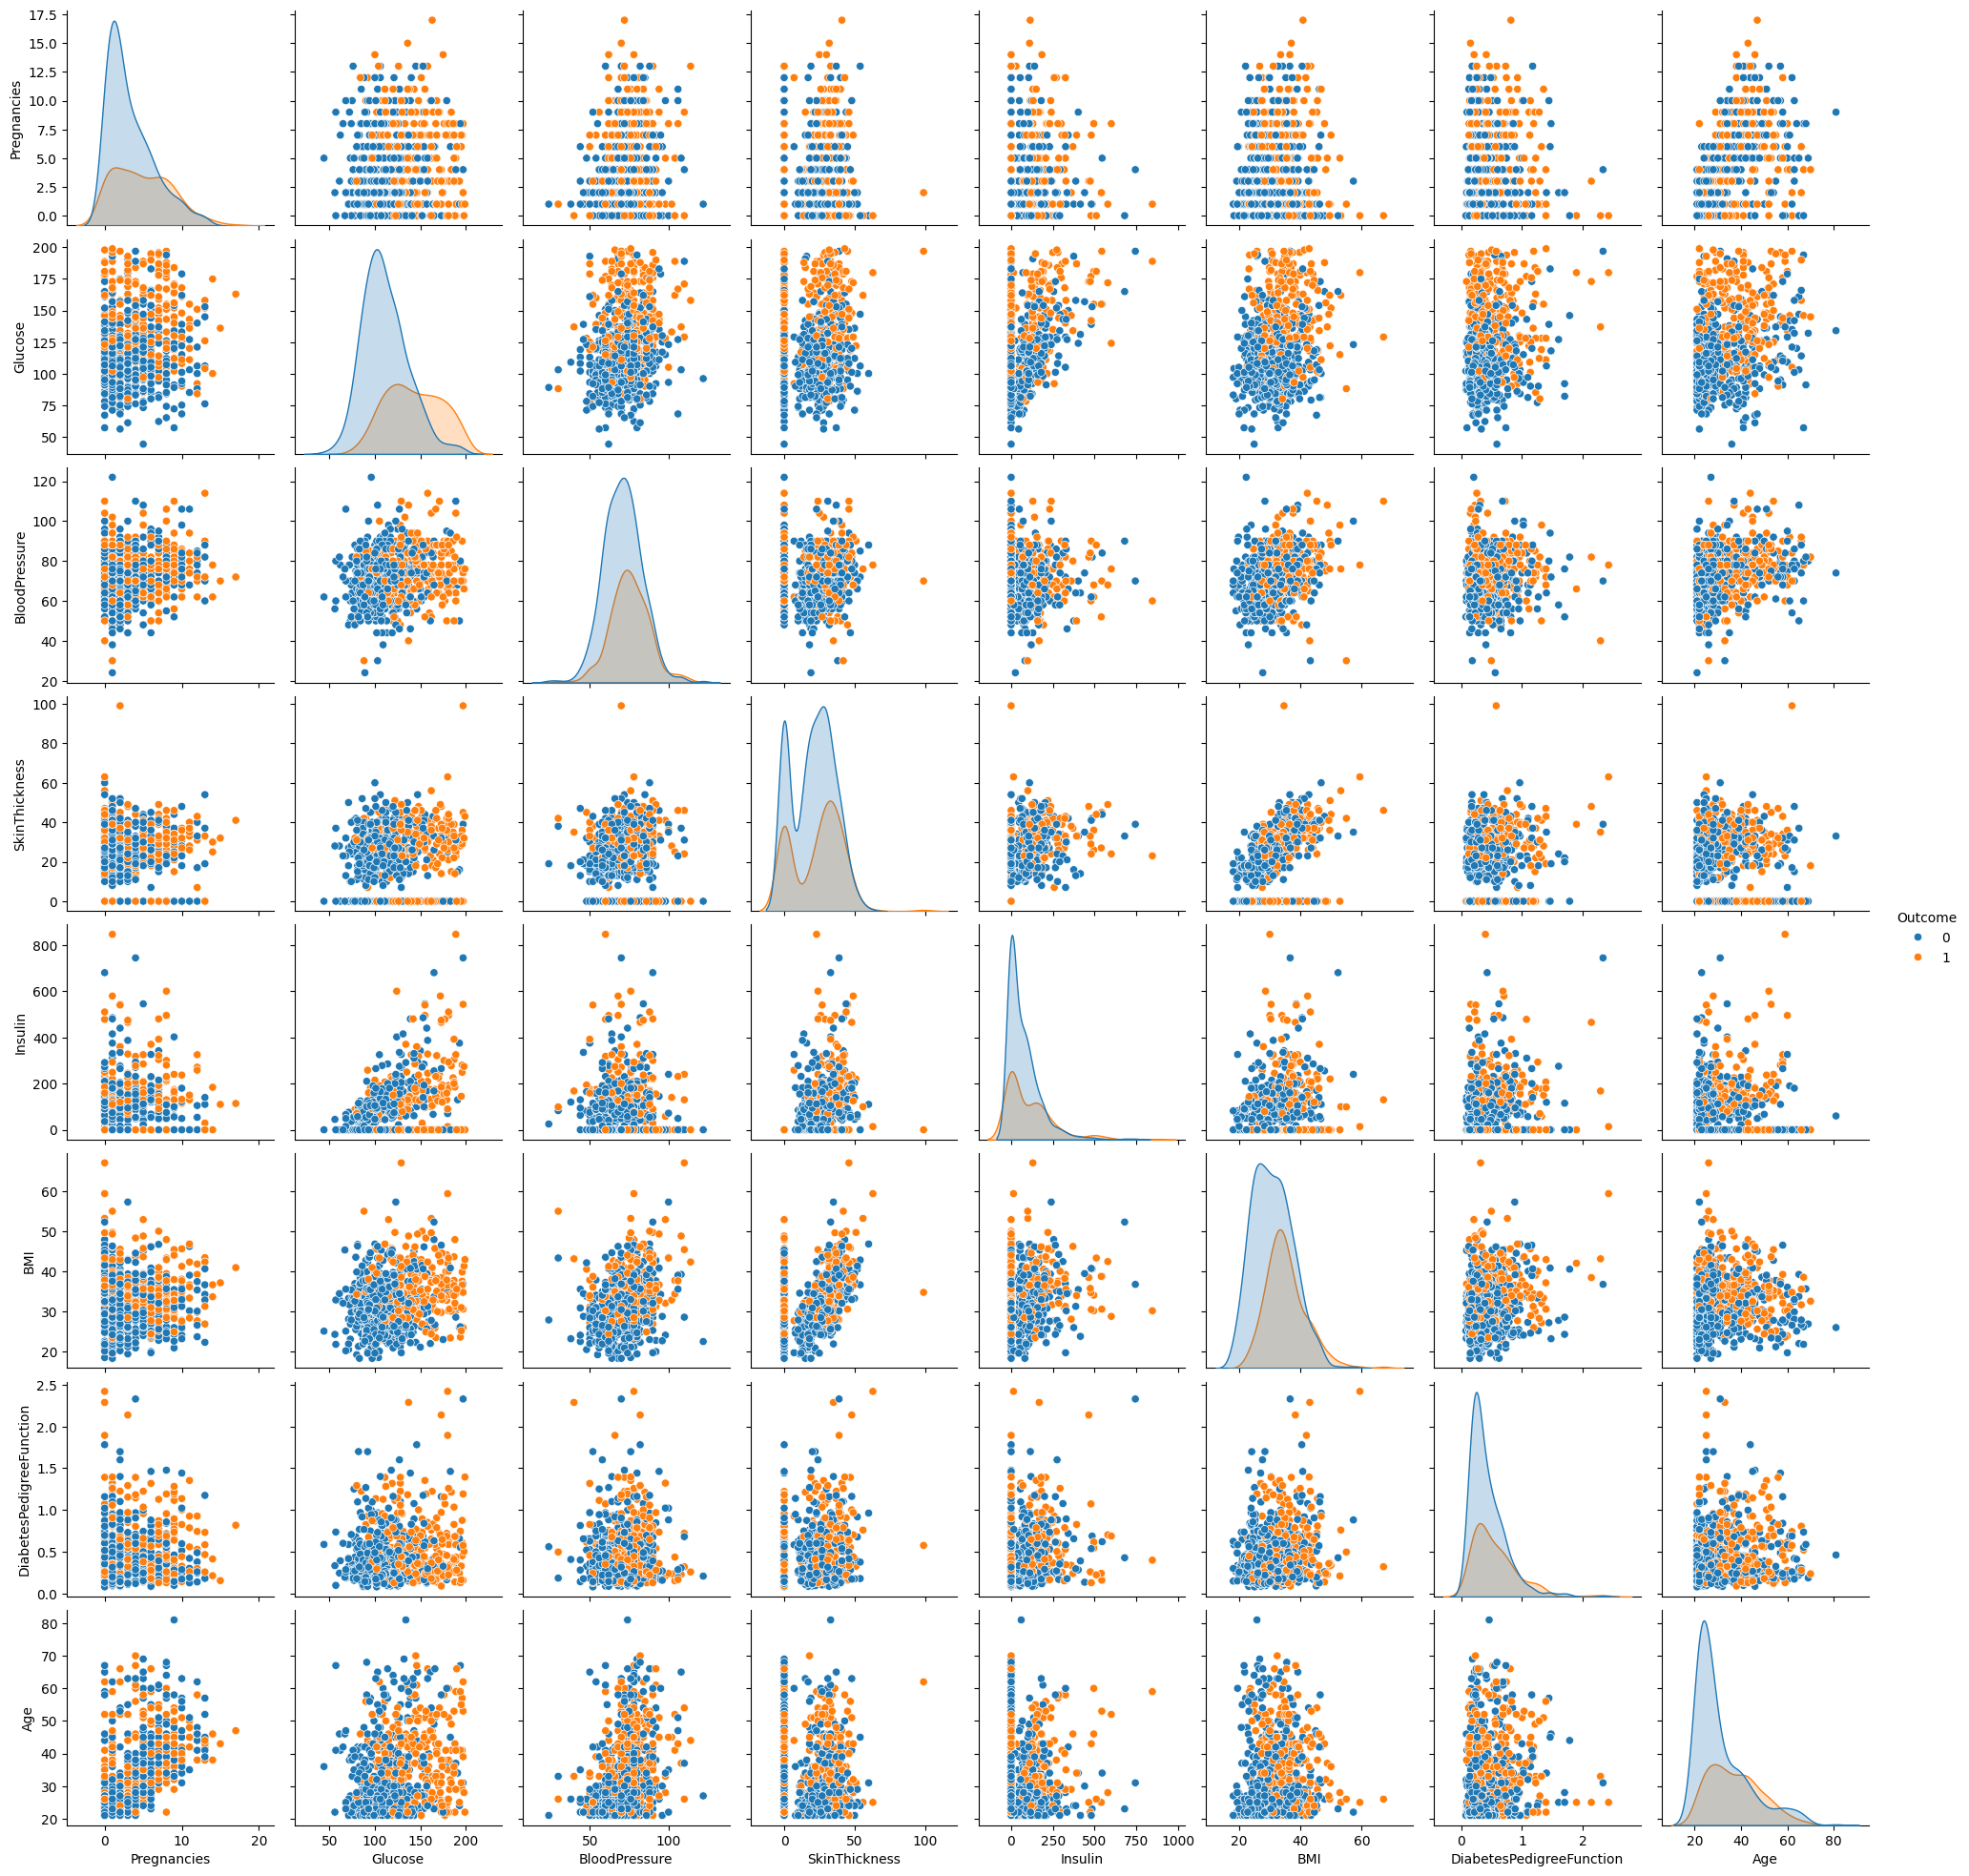

In [23]:
sns.pairplot(data = df , hue = "Outcome")

In [24]:
df.corr()["Outcome"].sort_values()

SkinThickness               0.092030
Insulin                     0.145488
BloodPressure               0.166703
DiabetesPedigreeFunction    0.184947
Pregnancies                 0.224417
Age                         0.245741
BMI                         0.299375
Glucose                     0.488384
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

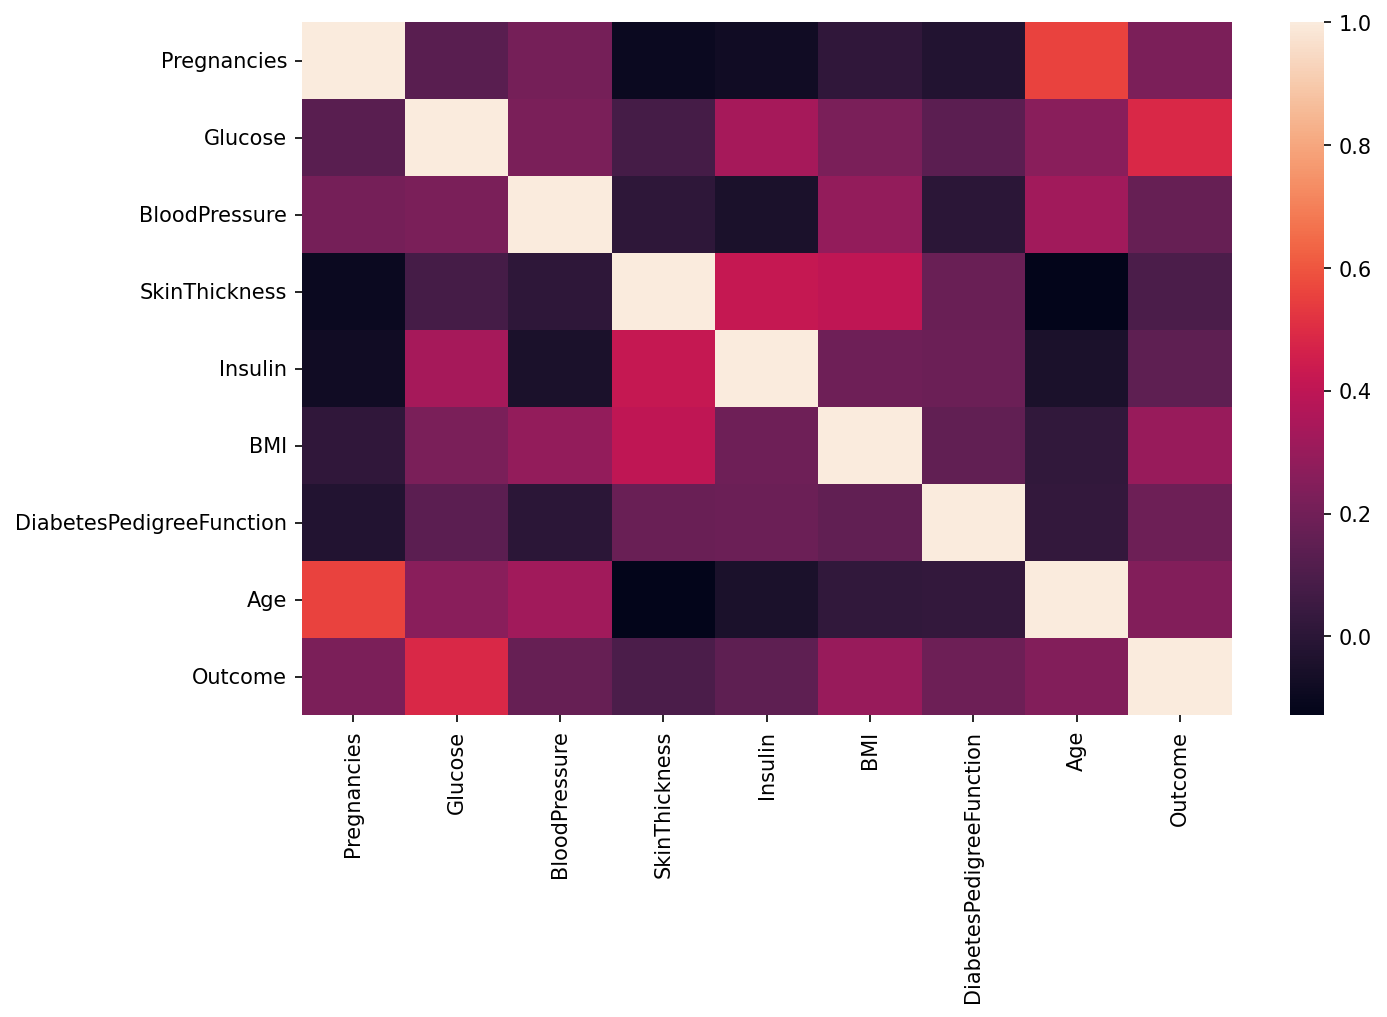

In [25]:
plt.figure(figsize=(10,6) , dpi = 150  )
sns.heatmap(df.corr())

# Model Training

In [26]:
X = df.drop("Outcome" , axis = 1)

In [27]:
y = df["Outcome"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_test, X_final_test, y_test, y_final_test = train_test_split(X_test, y_test, test_size=0.3, random_state=101)

In [31]:
len(X_train)

506

In [32]:
len(X_test)

152

In [33]:
len(X_final_test)

66

### Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score  , classification_report

In [37]:
model_rf = RandomForestClassifier()

In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV
model_rf_grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, 
                           cv=5, scoring='f1')

In [39]:
model_rf_grid_search.fit(X_train , y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [40]:
model_rf_grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [41]:
y_predictions = model_rf_grid_search.predict(X_test)

In [42]:
print(classification_report(y_test , y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           1       0.62      0.49      0.55        47

    accuracy                           0.75       152
   macro avg       0.71      0.68      0.69       152
weighted avg       0.74      0.75      0.74       152



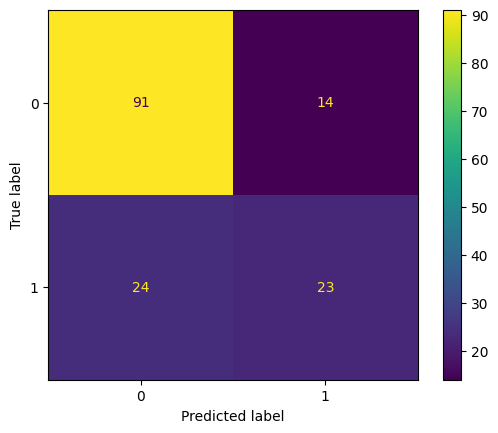

In [43]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_predictions)).plot();

### Ada Boost Classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
model_adaboost = AdaBoostClassifier()

In [46]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Set up GridSearchCV with AdaBoost classifier
grid_search = GridSearchCV(estimator=model_adaboost, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

In [47]:
grid_search.fit(X_train , y_train)

c:\Users\gaurav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [48]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [49]:
y_predictions = grid_search.predict(X_test)

In [50]:
print(classification_report(y_test , y_predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.62      0.53      0.57        47

    accuracy                           0.76       152
   macro avg       0.71      0.69      0.70       152
weighted avg       0.75      0.76      0.75       152



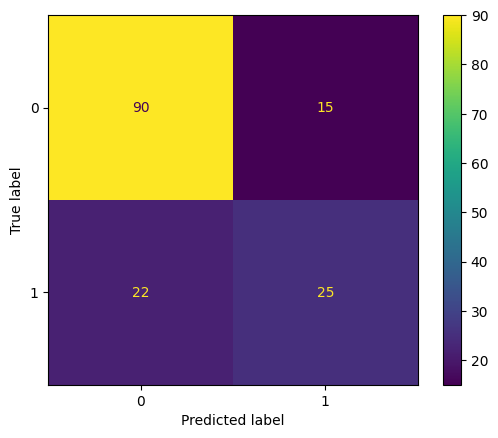

In [51]:
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test , y_predictions)).plot()

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
model_gb_classifier = GradientBoostingClassifier()

In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search_gb = GridSearchCV(estimator=model_gb_classifier, param_grid=param_grid, 
                           scoring='f1', cv=5, n_jobs=-1)

In [55]:
grid_search_gb.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [56]:
grid_search_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

In [57]:
y_predictions = grid_search_gb.predict(X_test)

In [58]:
print(classification_report(y_test  , y_predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.62      0.53      0.57        47

    accuracy                           0.76       152
   macro avg       0.71      0.69      0.70       152
weighted avg       0.75      0.76      0.75       152



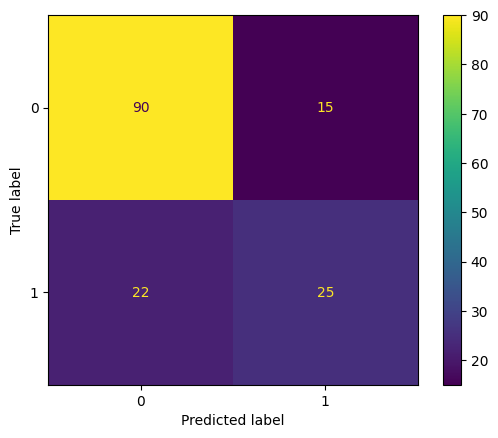

In [59]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , y_predictions)).plot()

In [60]:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

In [61]:
final_model_gb  = GradientBoostingClassifier(learning_rate= 0.1 , max_depth=3 , n_estimators= 50 , subsample= 0.8  )

In [62]:
final_model_gb.fit(X_train , y_train)

GradientBoostingClassifier(n_estimators=50, subsample=0.8)

In [63]:
y_predictions = final_model_gb.predict(X_final_test)

In [64]:
print(classification_report(y_final_test , y_predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.70      0.64      0.67        22

    accuracy                           0.79        66
   macro avg       0.76      0.75      0.76        66
weighted avg       0.78      0.79      0.79        66



In [65]:
len(X_final_test)

66

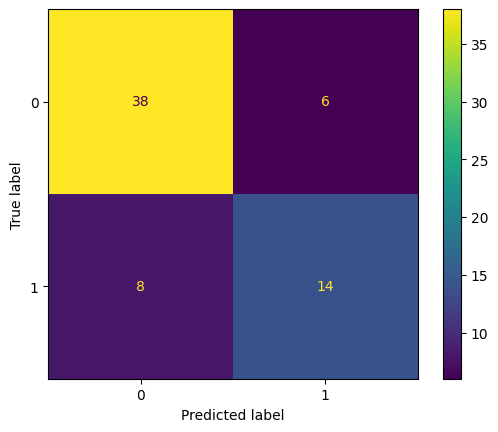

In [67]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_final_test , y_predictions)).plot() 

In [69]:
final_model_gb.feature_importances_

array([0.04956378, 0.42672465, 0.03933946, 0.01854336, 0.05773421,
       0.17053175, 0.09414739, 0.14341539])

In [70]:
feat = pd.DataFrame(data = final_model_gb.feature_importances_ , index = X.columns , columns=["Importance"] )

In [71]:
feat = feat.sort_values(by="Importance")

In [72]:
feat

,Importance
SkinThickness,0.018543
BloodPressure,0.039339
Pregnancies,0.049564
Insulin,0.057734
DiabetesPedigreeFunction,0.094147
Age,0.143415
BMI,0.170532
Glucose,0.426725


Text(0.5, 0, 'Feature Name')

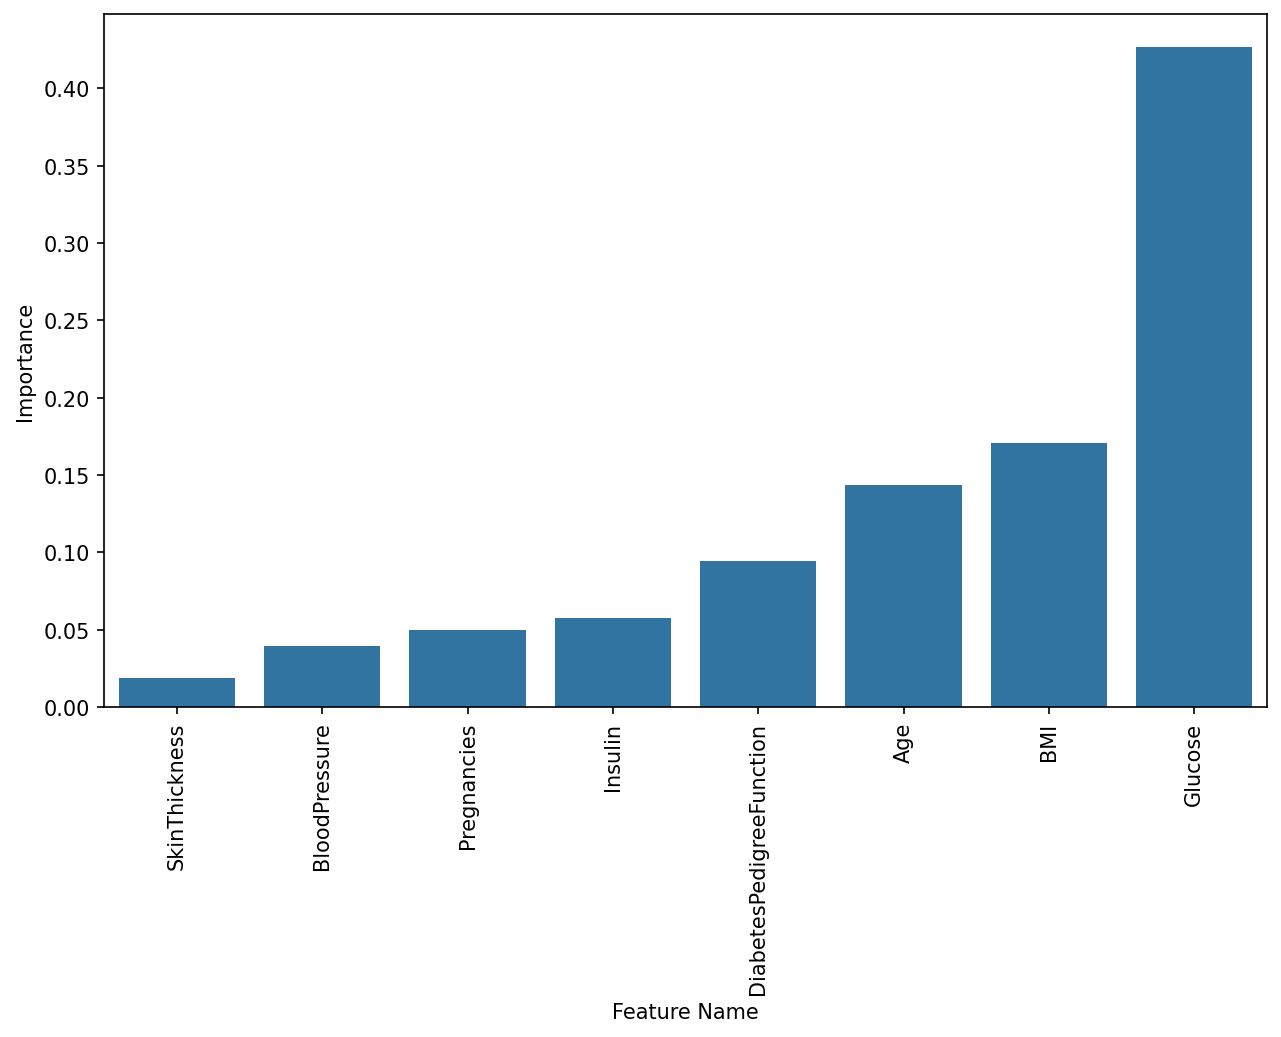

In [73]:
plt.figure(figsize=(10,6) , dpi = 150)
sns.barplot(data= feat , x = feat.index , y = "Importance")
plt.xticks(rotation = 90);
plt.xlabel("Feature Name")